# Operator Analysis & HPT

## Objective
1. Find the best Mutation and Crossover operators pair for our problem
2. Compare the performance of our Swap Mutation and Swap Crossover operators pair with default Pymoo operators
3. Find the best hyperparameters such as probability for each operators.

### Steps
1. we identified the following 3 mutation and 4 crossover operators. 
   - Mutation:
     - Bit Flip Mutation (BFM)
     - Polynomial Mutation (PM)
     - Swap Mutation (Ours)
   - Crossover:
     - Simulated Binary Crossover (SBX)
     - Single Point Crossover
     - Two Point Crossover
     - Swap Crossover (Ours)
2. This gives us 12 operator pairs. 
3. For each operator, we select 4 intervals of probability parameters; 0.2, 0.4, 0.6, 0.8. This expands our search space to 192 permutations to run.
4. Run `operator_analysis.py` with the relevant config.

### Reducing search space and execution time

Given that each operator takes about 5 mins to run, we are looking at about 16hours to find the best operator pair for a initial population size of 10 and generations of 100. (much longer if we do the actual initial pop size of 1000.) This is only for 1 time period of `Time_ID` of 1375 and random seed of 2. We also note that in [Pymoo Hyperparameter Optimization (HPO)](https://pymoo.org/algorithms/hyperparameters.html), Optuna is used and each problems is also evaluated also different seed values, making the search space even larger.

We decided to run a preliminary HPO by running the full 192 run on our "toy" model. The toy model has all the same parameters and the only difference is that the demand function integrated fitness function is replaced with a static price list to reduce computation time. 

**Key Assumptions**
1. We assume that best operator pair and hyperparameters is transferable from the toy model to the actual demand function integrated GA model. 
2. The best operator pair and hyperparameters will be robust enough and perform well across different constraints and time periods.

The logs for this run is available at `hpt_full_192.log` in the assets folder. 

Subsequently, we picked the best hyperparameters for each operator pair and run the final 12 permutation on the actual demand function integrated GA.

The logs for this run is available at `hpt_selected_192.log` in the assets folder. 

**Note:** The `operator_analysis.py` also produces the `hpt_full_192.pkl` and `hpt_selected_12.pkl`. This pickle files are huge at about 6+GB and 1+GB respectively and may be available in the actual submission.


In [2]:
import pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pop_ga


## Selected 12 Operators

In [3]:
res_pkl_path = '../assets/hpt_selected_12.pkl'
file_size = os.path.getsize(res_pkl_path)
print(f"The size of '{res_pkl_path}' is {file_size} bytes.")

The size of '../assets/hpt_selected_12.pkl' is 1734242215 bytes.


In [4]:
with open(res_pkl_path, 'rb') as f:
    result_dict = pickle.load(f)

In [6]:
result_dict

[{'crossover': 'TwoPointCrossover',
  'crossover_prob': 0.4,
  'mutation': 'PolynomialMutation',
  'mutation_prob': 0.6,
  'result': <pymoo.core.result.Result at 0x127c20970>,
  'objective_value': -70997.50015636685,
  'elapsed_time': 210.40265703201294},
 {'crossover': 'SinglePointCrossover',
  'crossover_prob': 0.2,
  'mutation': 'SwapMutation',
  'mutation_prob': 0.8,
  'result': <pymoo.core.result.Result at 0x153461150>,
  'objective_value': -70975.24842109028,
  'elapsed_time': 411.0201609134674},
 {'crossover': 'SwapCrossover',
  'crossover_prob': 0.8,
  'mutation': 'SwapMutation',
  'mutation_prob': 0.4,
  'result': <pymoo.core.result.Result at 0x1571c0d60>,
  'objective_value': -70896.91505522694,
  'elapsed_time': 410.1004719734192},
 {'crossover': 'TwoPointCrossover',
  'crossover_prob': 0.8,
  'mutation': 'SwapMutation',
  'mutation_prob': 0.8,
  'result': <pymoo.core.result.Result at 0x16a6fd480>,
  'objective_value': -70830.1575942664,
  'elapsed_time': 413.54667925834656}

In [7]:
sorted_results = sorted(result_dict, key=lambda x: x["objective_value"])
sorted_results

[{'crossover': 'TwoPointCrossover',
  'crossover_prob': 0.4,
  'mutation': 'PolynomialMutation',
  'mutation_prob': 0.6,
  'result': <pymoo.core.result.Result at 0x127c20970>,
  'objective_value': -70997.50015636685,
  'elapsed_time': 210.40265703201294},
 {'crossover': 'SinglePointCrossover',
  'crossover_prob': 0.2,
  'mutation': 'SwapMutation',
  'mutation_prob': 0.8,
  'result': <pymoo.core.result.Result at 0x153461150>,
  'objective_value': -70975.24842109028,
  'elapsed_time': 411.0201609134674},
 {'crossover': 'SwapCrossover',
  'crossover_prob': 0.8,
  'mutation': 'SwapMutation',
  'mutation_prob': 0.4,
  'result': <pymoo.core.result.Result at 0x1571c0d60>,
  'objective_value': -70896.91505522694,
  'elapsed_time': 410.1004719734192},
 {'crossover': 'TwoPointCrossover',
  'crossover_prob': 0.8,
  'mutation': 'SwapMutation',
  'mutation_prob': 0.8,
  'result': <pymoo.core.result.Result at 0x16a6fd480>,
  'objective_value': -70830.1575942664,
  'elapsed_time': 413.54667925834656}

In [8]:
df = pd.DataFrame(sorted_results)

# Remove the 'result' column from the DataFrame
df.drop(columns=['result'], inplace=True)
df

,crossover,crossover_prob,mutation,mutation_prob,objective_value,elapsed_time
0,TwoPointCrossover,0.4,PolynomialMutation,0.6,-70997.500156,210.402657
1,SinglePointCrossover,0.2,SwapMutation,0.8,-70975.248421,411.020161
2,SwapCrossover,0.8,SwapMutation,0.4,-70896.915055,410.100472
3,TwoPointCrossover,0.8,SwapMutation,0.8,-70830.157594,413.546679
4,SwapCrossover,0.8,PolynomialMutation,0.2,-70658.378136,282.968159
5,SinglePointCrossover,0.2,PolynomialMutation,0.8,-70542.023793,148.540148
6,SBX,0.8,PolynomialMutation,0.8,-70285.456126,224.031254
7,SwapCrossover,0.6,BFM,0.2,-70137.071790,267.267248
8,SBX,0.2,SwapMutation,0.4,-69912.110382,277.216669
9,SinglePointCrossover,0.8,BFM,0.8,-69749.869434,200.949056


Best Operator Pairs:

1. TwoPointCrossover: 0.4, PM: 0.6
2. SinglePointCrossover:0.2, SwapMuation:0.8

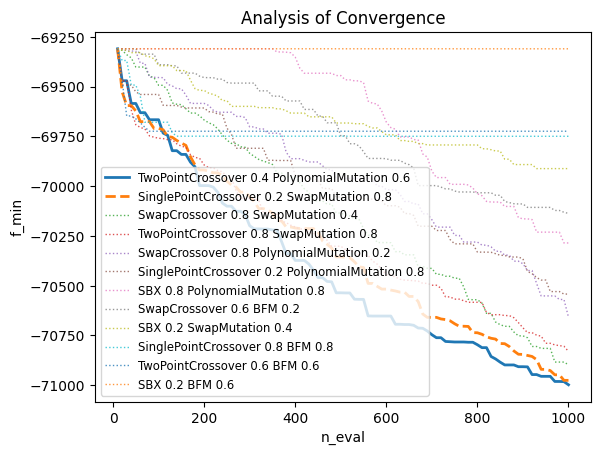

In [9]:
for idx, r in enumerate(result_dict):
    label = f'{r["crossover"]} {r["crossover_prob"]} {r["mutation"]} {r["mutation_prob"]}'
    n_evals = np.array([e.evaluator.n_eval for e in r["result"].history])
    opt = np.array([e.opt[0].F for e in r["result"].history])
    
    if idx == 0:
        plt.plot(n_evals, opt, label=label, linestyle='solid', linewidth=2)
    elif idx == 1:
        plt.plot(n_evals, opt, label=label, linestyle='--', linewidth=2)
    else:
        plt.plot(n_evals, opt, label=label, linestyle='dotted', linewidth=1, alpha=0.8)


plt.title("Analysis of Convergence")
plt.xlabel("n_eval")
plt.ylabel("f_min")
plt.legend(loc="lower left", fontsize="small")
plt.show()